<a href="https://colab.research.google.com/github/Mayank-glitch-cpu/Intelligent_image_forwarding/blob/main/Intelligent_image_forwarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# path to images
path = '/content/animals/'

# animal categories
categories = ['dogs', 'panda', 'cats']
    

In [ ]:
import zipfile as zf
import os

In [ ]:
from zipfile import ZipFile
filename = '/content/drive/MyDrive/archive.zip'
with ZipFile(filename, 'r') as Zip:
  Zip.extractall()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>1. Display some pictures</h1>

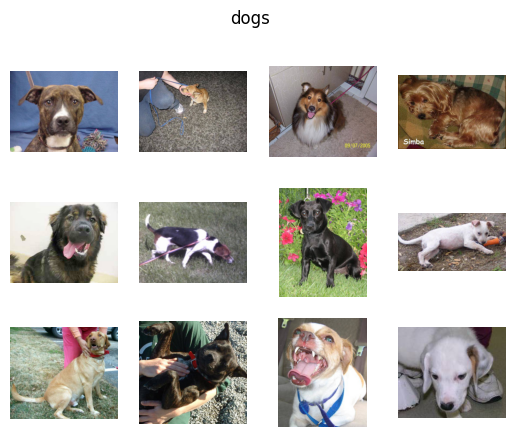

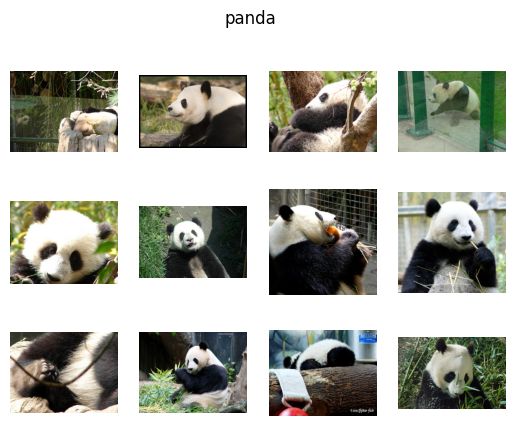

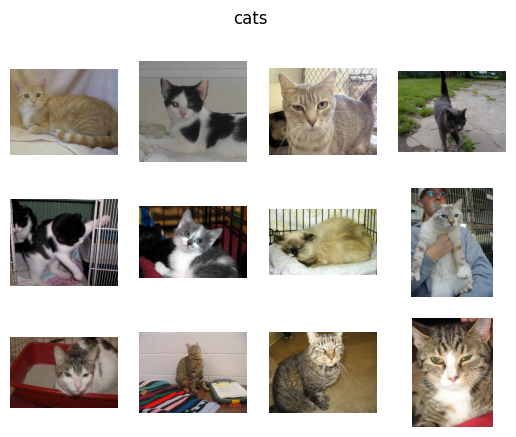

In [ ]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

<h1>2. Pictures shape</h1>

In [ ]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []


dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


Since images have different shapes, let's resize pictures to height = 32 and width = 55.

<h1>3. Preprocess data and label inputs</h1>

In [ ]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)



[['/content/animals/cats/cats_00653.jpg', 2], ['/content/animals/dogs/dogs_00484.jpg', 0], ['/content/animals/cats/cats_00523.jpg', 2], ['/content/animals/dogs/dogs_00012.jpg', 0], ['/content/animals/cats/cats_00946.jpg', 2], ['/content/animals/cats/cats_00629.jpg', 2], ['/content/animals/dogs/dogs_00003.jpg', 0], ['/content/animals/panda/panda_00795.jpg', 1], ['/content/animals/dogs/dogs_00104.jpg', 0], ['/content/animals/dogs/dogs_00607.jpg', 0]]


In [ ]:
print(data)
print(labels)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

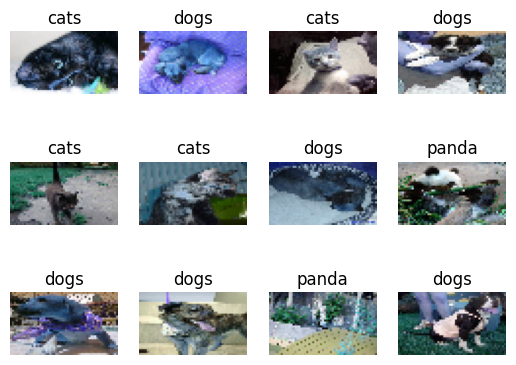

In [ ]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

<h1>4. Split dataset into train and test set</h1>

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Preprocess class labels
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400, 3)
(600,)


In [ ]:
testX.shape


(600, 32, 55, 3)

<h1>5. Define model architecture</h1>

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 13, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2912)              0

<h1>6. Fit model on training data</h1>

In [ ]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
75/75 [==============================] - 8s 90ms/step - loss: 0.9078 - accuracy: 0.5271
Epoch 2/25
75/75 [==============================] - 5s 63ms/step - loss: 0.7342 - accuracy: 0.6150
Epoch 3/25
75/75 [==============================] - 3s 46ms/step - loss: 0.6808 - accuracy: 0.6737
Epoch 4/25
75/75 [==============================] - 3s 46ms/step - loss: 0.6496 - accuracy: 0.6837
Epoch 5/25
75/75 [==============================] - 5s 74ms/step - loss: 0.5970 - accuracy: 0.7133
Epoch 6/25
75/75 [==============================] - 4s 49ms/step - loss: 0.5890 - accuracy: 0.7212
Epoch 7/25
75/75 [==============================] - 3s 46ms/step - loss: 0.5326 - accuracy: 0.7546
Epoch 8/25
75/75 [==============================] - 4s 47ms/step - loss: 0.5141 - accuracy: 0.7671
Epoch 9/25
75/75 [==============================] - 6s 74ms/step - loss: 0.4830 - accuracy: 0.7892
Epoch 10/25
75/75 [==============================] - 3s 46ms/step - loss: 0.4836 - accuracy: 0.7883
Epoch 11/

<h1>7. Evaluate model on test data</h1>

19/19 [==============================] - 0s 15ms/step


<ipython-input-22-5f985ab5bd7c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
<ipython-input-22-5f985ab5bd7c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


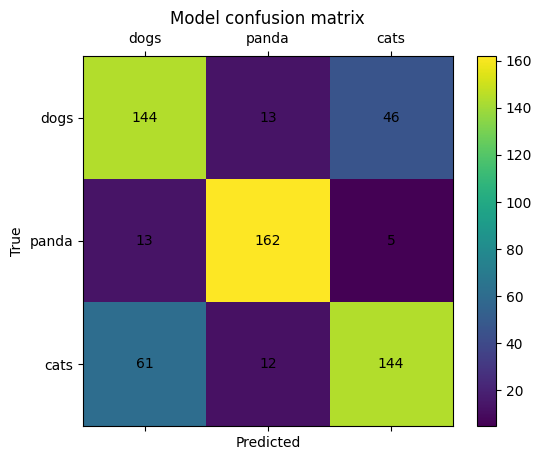

Accuracy : 75.00%


In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [ ]:
from PIL import Image as im
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3
data=[]
for i in range(1,4):
  image = cv2.imread(str(i)+'.jpg')
  image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
  data.append(image)
  data = np.array(data, dtype="float") / 255.0
  print(data.shape)
  pred = model.predict(data)
  predictions = argmax(pred, axis=1)
  print(predictions)
  print(data.shape)
  
  print(i)
  if predictions==1:
    data=data.reshape(32,55,3)
    print(data.shape)
    img=im.fromarray((data * 255).astype(np.uint8))
    img.save('to_send.jpg')
  data=[]

(1, 32, 55, 3)
1/1 [==============================] - 0s 22ms/step
[1]
(1, 32, 55, 3)
1
(32, 55, 3)
(1, 32, 55, 3)
1/1 [==============================] - 0s 21ms/step
[1]
(1, 32, 55, 3)
2
(32, 55, 3)
(1, 32, 55, 3)
1/1 [==============================] - 0s 21ms/step
[2]
(1, 32, 55, 3)
3


In [ ]:
# importing libraries
import cv2
import numpy as np

image = cv2.imread('/content/1.jpg')

cv2.imshow('Original Image', image)
cv2.waitKey(0)

# Gaussian Blur
Gaussian = cv2.GaussianBlur(image, (7, 7), 0)
cv2.imshow('Gaussian Blurring', Gaussian)
cv2.waitKey(0)

# Median Blur
median = cv2.medianBlur(image, 5)
cv2.imshow('Median Blurring', median)
cv2.waitKey(0)


# Bilateral Blur
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
cv2.imshow('Bilateral Blurring', bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()


DisabledFunctionError: ignored

In [ ]:
m pred = model.predict(testX[0].reshape(1,32,55,3))
predictions = argmax(pred, axis=1)

In [ ]:
print(predictions)

In [ ]:
model.save()